In [1]:
import pandas as pd
import seaborn as sns


In [2]:
homeless = pd.read_csv("homeless_19.csv")
income = pd.read_csv("income_2021.csv")
unemp = pd.read_csv("unemployment_2021.csv")
all_data = pd.read_csv("homeless_19.csv")
all_data = all_data.drop('fin_yr', axis=1)

In [12]:
all_data = all_data.merge(income,how='left', left_on=" gccsa_code", right_on=" gccsa_code_2021")

In [13]:
all_data = all_data.drop(' gccsa_code_2021', axis = 1)

,gccsa_code,client_count,median_mortgage_repay_monthly,median_rent_weekly,median_tot_fam_inc_weekly
0,1GSYD,27877,2427,470,2374
1,1RNSW,38919,1733,330,1852
2,2GMEL,63354,2000,390,2243
3,2RVIC,34458,1430,285,1808
4,3GBRI,13714,1863,380,2175
5,3RQLD,25891,1655,345,1868
6,4GADE,13176,1562,320,1988
7,4RSAU,5589,1153,220,1525
8,5GPER,12315,1907,350,2259
9,5RWAU,9491,1560,265,2013


In [15]:
all_data.rename(columns={' gccsa_code': 'GCC', ' client_count': "homeless_count",
                    'median_mortgage_repay_monthly': 'mortgage', ' median_rent_weekly': 'rent', 
                    ' median_tot_fam_inc_weekly': 'family_income'}, inplace=True)
all_data.head()

,GCC,homeless_count,mortgage,rent,family_income
0,1GSYD,27877,2427,470,2374
1,1RNSW,38919,1733,330,1852
2,2GMEL,63354,2000,390,2243
3,2RVIC,34458,1430,285,1808
4,3GBRI,13714,1863,380,2175


In [16]:
cormat = all_data.corr()
round(cormat,2)

/var/folders/40/9vw7p_6x52g01tcrwk2ntylm0000gn/T/ipykernel_25129/1213747157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = all_data.corr()


,homeless_count,mortgage,rent,family_income
homeless_count,1.00,0.30,0.33,0.08
mortgage,0.30,1.00,0.79,0.76
rent,0.33,0.79,1.00,0.85
family_income,0.08,0.76,0.85,1.00


<Axes: xlabel='family_income', ylabel='homeless_count'>

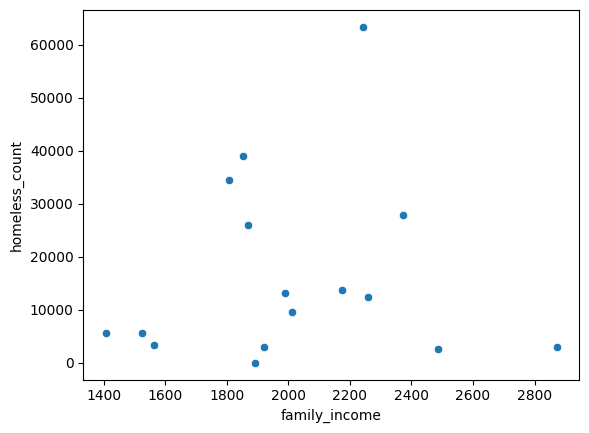

In [17]:
sns.scatterplot(x="family_income", y="homeless_count", data=all_data)

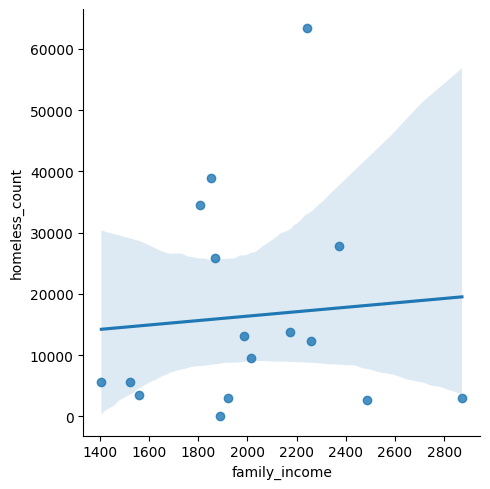

In [18]:
sns.lmplot(x="family_income", y="homeless_count", data=all_data)

<Axes: xlabel='mortgage', ylabel='homeless_count'>

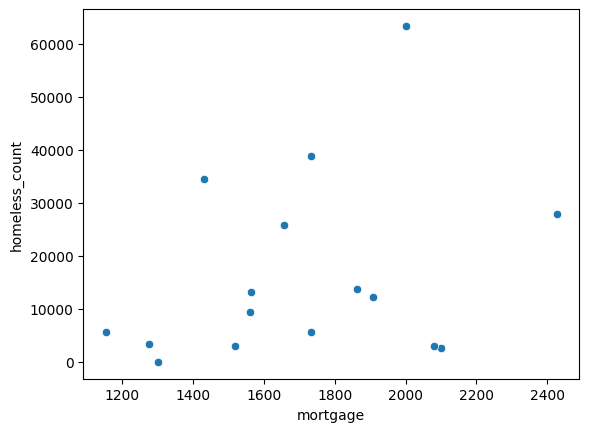

In [19]:
sns.scatterplot(x="mortgage", y="homeless_count", data=all_data)

<Axes: xlabel='rent', ylabel='homeless_count'>

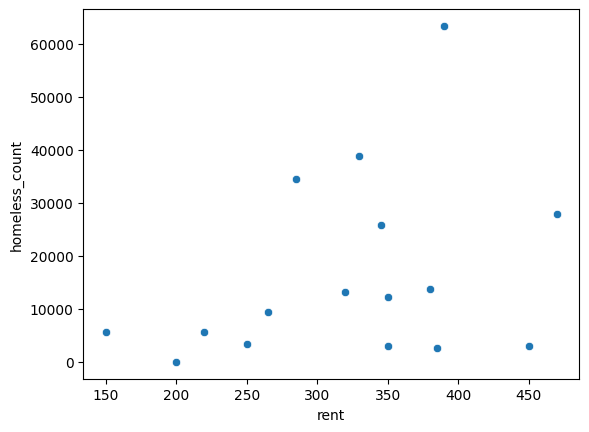

In [20]:
sns.scatterplot(x="rent", y="homeless_count", data=all_data)

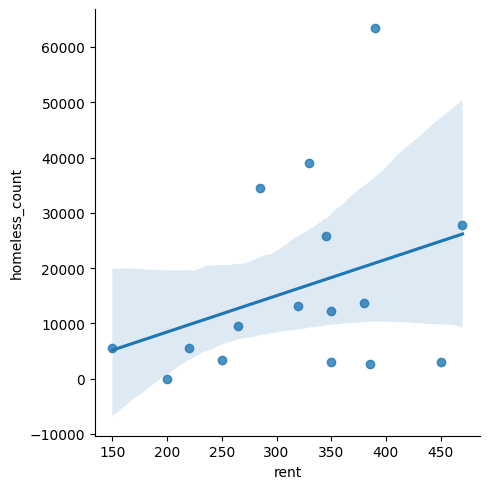

In [21]:
sns.lmplot(x="rent", y="homeless_count", data=all_data)

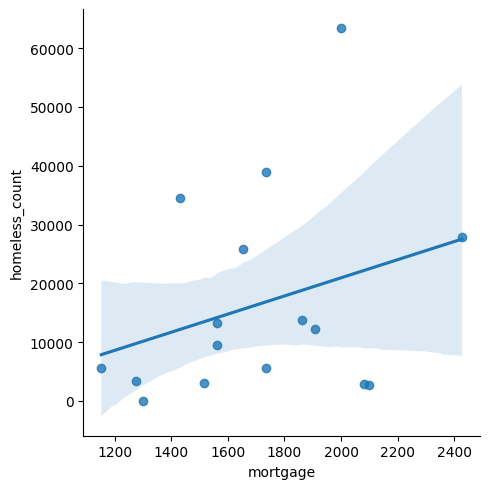

In [22]:
sns.lmplot(x="mortgage", y="homeless_count", data=all_data)

<Axes: >

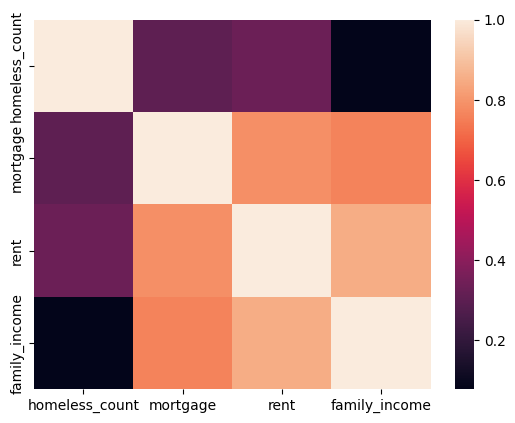

In [23]:
sns.heatmap(cormat)

In [26]:
all_data.to_csv('all_data.csv', index=False)

In [3]:
list(unemp.columns)

['yth_unemp_rt_15_24', ' mpy_rt_15_64', ' unemp_rt_15', ' gccsa_code_2016']

In [4]:
unemp.rename(columns={' gccsa_code_2016': 'GCC', ' unemp_rt_15': 'unemployment_rate', ' mpy_rt_15_64':'employment_rate'}, inplace=True)
unemp = unemp.drop('yth_unemp_rt_15_24', axis = 1)
column_order = ['GCC', 'employment_rate', 'unemployment_rate'] 

In [5]:
unemp = unemp[column_order]

,GCC,employment_rate,unemployment_rate
0,1GSYD,73.699997,5.3
1,2GMEL,75.000000,5.4
2,3GBRI,75.400002,5.8
3,4GADE,74.300003,5.6
4,5GPER,77.099998,4.9


In [44]:
unemp.to_csv('unemp_sudo.csv', index=False)